Load MNIST dataset to train a LeNET deep training model for hand-writing digits.
First, load Keras, Sklearn, Numpy, and Matplotlib

In [3]:
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np


The MNIST database contains a total of 70000 examples of handwritten digits of size 28x28 pixels, labeled from 0 to 9.
Load MNIST dataset ~ 55MB

In [2]:
dataset = datasets.fetch_mldata("MNIST Original")
data = dataset.data

In [6]:
# check data shape
print(data.shape)

(70000, 784)


In [14]:
# channels first or channels last
if K.image_data_format() == "channels_first":
    data = data.reshape(data.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    data = data.reshape(data.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

In [8]:
# normalize data from [0-255] to [0-1]
# split 25% data for testing
(trainX, testX, trainY, testY) = train_test_split(data/255.0, dataset.target.astype("int"), test_size=0.25, random_state=42)

In [9]:
# convert labels from integers to vectors
le = LabelBinarizer()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)

In [10]:
# use optimizer SGD with learning rate 0.01
opt = SGD(lr=0.01)

In [16]:
# create LeNet model
# image size 28x28, grayscale
# 10 classes 0..9
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


num_classes = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# optimize loss on categorical_crossentropy
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [17]:
# train the network with training and testing data, batch record size 128, and 20 iterations (epochs)
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=128, epochs=20, verbose=1)

Train on 52500 samples, validate on 17500 samples
Epoch 1/20
52500/52500 [==============================] - 96s 2ms/step - loss: 1.2212 - acc: 0.6099 - val_loss: 0.3875 - val_acc: 0.8795
Epoch 2/20
52500/52500 [==============================] - 95s 2ms/step - loss: 0.4787 - acc: 0.8525 - val_loss: 0.2628 - val_acc: 0.9215
Epoch 3/20
52500/52500 [==============================] - 98s 2ms/step - loss: 0.3897 - acc: 0.8814 - val_loss: 0.2360 - val_acc: 0.9287
Epoch 4/20
52500/52500 [==============================] - 98s 2ms/step - loss: 0.3460 - acc: 0.8955 - val_loss: 0.2034 - val_acc: 0.9377
Epoch 5/20
52500/52500 [==============================] - 95s 2ms/step - loss: 0.3171 - acc: 0.9036 - val_loss: 0.1802 - val_acc: 0.9470
Epoch 6/20
52500/52500 [==============================] - 96s 2ms/step - loss: 0.2897 - acc: 0.9125 - val_loss: 0.1684 - val_acc: 0.9510
Epoch 7/20
52500/52500 [==============================] - 96s 2ms/step - loss: 0.2754 - acc: 0.9165 - val_loss: 0.1645 - val_acc

In [18]:
# evaluate the network
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in le.classes_]))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1677
          1       0.98      0.99      0.98      1935
          2       0.98      0.97      0.97      1767
          3       0.95      0.98      0.96      1766
          4       0.98      0.97      0.97      1691
          5       0.97      0.96      0.96      1653
          6       0.98      0.97      0.98      1754
          7       0.97      0.98      0.97      1846
          8       0.96      0.96      0.96      1702
          9       0.97      0.94      0.95      1709

avg / total       0.97      0.97      0.97     17500



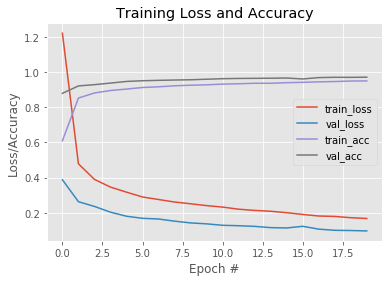

In [19]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


In [20]:
model.save('digits_model')